# Одномерные случайные величины

### Непрерывная СВ

In [10]:
from random import random
from scipy.integrate import quad
from scipy.stats import chi2, t

from sympy import *

import matplotlib.pyplot as plt
import numpy as np

In [11]:

def get_inv_from_density(str_func, a, b):
            x, y = symbols("x y")
            expr = sympify(str_func)
            expr = integrate(expr, (x, a, x))
            expr = solve(expr - y, x)
            return expr[0]

def get_inv_from_function(str_func, a, b):
            x, y = symbols("x y")
            expr = sympify(str_func)
            expr = solve(expr - y, x)
            return expr[0]
    
#print(get_inv_from_density("0.5*exp(-0.5*x)", 0, oo))

In [12]:
def continuous_distribution(a, b):
        return (b - a) * random() + a


In [13]:
#print("Введите закон распределения:")
str_func = "1/(2*pi)**0.5 * exp(-((x)**2)/2)"
#print("Введите левую границу:")
a = -10
#print("Введите правую границу:")
b = 10

def generate_series(n):
    y = Symbol("y", real=True)
    expr = get_inv_from_density(str_func, a, b)
    new_f = lambdify(y, expr)
    res = []
    for i in range(n):
        res.append(np.around(new_f(random()),3))
    return res



In [66]:
#"1/(7-5)"
#"5"
#"7"

In [6]:
amount = 100
yzz = generate_series(amount) 
print(yzz)

[0.392, -0.856, 0.587, 0.074, 0.565, 0.027, 0.479, -1.395, -0.707, 0.708, 1.009, -0.524, -1.036, -0.45, 0.603, -1.093, -0.45, 0.951, -1.37, 1.143, -0.32, -1.254, 1.851, 0.037, 1.467, 1.588, -0.613, -1.883, -1.158, -0.185, 2.077, 0.571, 0.787, 0.766, 1.167, -0.091, 1.504, 0.955, 0.674, -0.648, 1.87, -0.053, 0.634, -0.501, 1.545, -0.046, -0.917, -1.596, -1.089, 1.324, 1.238, 2.147, 1.284, 0.54, 0.56, 0.258, 1.582, 0.306, -0.766, 0.565, -0.664, -0.083, -1.093, 0.817, 0.253, 0.173, -0.338, -1.225, 0.76, -1.173, -0.688, 2.2, 0.671, -0.649, 0.705, 1.109, 0.408, -1.027, -1.05, 1.517, 1.281, 0.787, -1.652, -1.729, 0.008, 1.056, 0.271, 1.477, 1.433, -1.035, -0.96, -0.475, 0.575, -1.297, 0.515, -0.548, -0.242, -0.515, 0.794, 1.873]


In [68]:
#get_inv_from_function(str_func, a, b)

In [ ]:

amount = 100
y1 = generate_series(amount) 
for i in range(len(y1)):
    y1[i] = y1[i] / (a + b) * 2 / (b-a)

x1 = list(np.linspace(5, 7, num=amount))
plt.ylim(0, 1)
plt.title("Эмпирическая плотность распределения")

plt.plot(x1, y1)


In [14]:

def plot_show(has_legend=True):
    plt.grid(True, which='both', linestyle='--')
    if has_legend:
        plt.ylabel('Длина интервала')
        plt.xlabel('$\y$')
        plt.legend()
    plt.show()


def calculate_intervals_len(interval):
    return [i[1] - i[0] for i in interval]

In [15]:
def get_dist_func(str_func, a, b):
            x, y = symbols("x y")
            expr = sympify(str_func)
            expr = integrate(expr, (x, a, x))
            new_f = lambdify(x, expr)
            return new_f

def F(x):
    y = Symbol("y", real=True)
    func = get_dist_func(str_func, a, b)
    return func(x)
    


In [10]:
conf_level = (0.90, 0.95, 0.99)

In [11]:
series = generate_series(50000)
series.sort()

In [17]:
def equal_interval_hist(x, n, m):
    h = (x[n-1] - x[0]) / m
    A = []
    B = []
    for i in range(m):
        A.append(x[0] + i*h)
    for i in range(m - 1):
        B.append(A[i + 1])
    B.append(x[-1])
    p = [0] * m
    f = [0] * m
    for i in range(m):
        for j in x:
            if B[i] == j:
                if i + 1 < m:
                    p[i] += 0.5
                    p[i + 1] += 0.5
                else:
                    p[i] += 0.5
            elif A[i] < j < B[i]:
                p[i] += 1
        f[i] = p[i] / (n * h)
    return (A, B, f, p)



In [18]:
def equal_probability_hist(y, n, parts):
    m_count = parts
    m = n // m_count
    A = []
    B = []
    h = [0] * m_count
    f = [0] * m_count
    A.append(y[0])
    for i in range(1, m_count):
        A.append((y[m * i] + y[m * i + 1]) / 2)
    for i in range(m_count - 1):
        B.append(A[i + 1])
    B.append(y[-1])

    for i in range(m_count):
        h[i] = B[i] - A[i]
        f[i] = m / (n * h[i]) if h[i] != 0 else 0
    return (A, B, f, m)

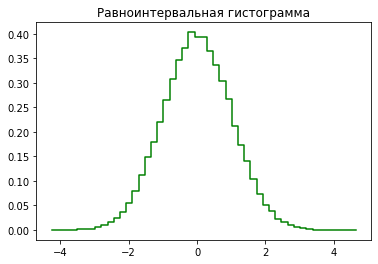

In [14]:
A_new, B_new, f_new, m_new = equal_interval_hist(series, len(series), 50)
plt.title("Равноинтервальная гистограмма")

plt.step(B_new, f_new, color='green')
plt.show()

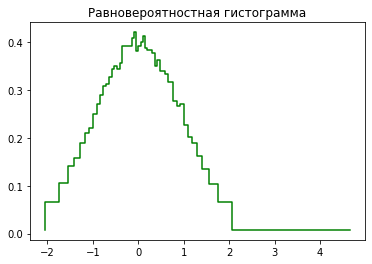

In [15]:
A_new, B_new, f_new, m_new = equal_probability_hist(series, len(series), 50)
plt.title("Равновероятностная гистограмма")

plt.step(B_new, f_new, color='green')
plt.show()

Точечная оценка мат. ожидания:

\begin{equation*}
m_x^* = \frac{1} n \sum_{i=1}^n x_i
\end{equation*}

Точечная оценка дисперсии:

\begin{equation*}
D = \frac{1}{n-1} \sum_{i=1}^n{\left( x_i - m_x^* \right)}^2
\end{equation*}

In [16]:
def calculate_expected_value(series):
    return np.around(sum(series) / len(series), 4)

In [17]:
def calculate_dispersion(expected_val, series):
    return np.around(sum([(i - expected_val) ** 2 for i in series]) / (len(series) - 1), 4)


In [18]:
print("n:")
n = int(input())
ser = generate_series(n)
exp = calculate_expected_value(ser)
print(f"Значения: {ser}")
print(f"Точечная оценка Мат. ожидания: {exp}")
print(f"Точечная оценка Дисперсии: {calculate_dispersion(exp, ser)}")

n:
100
Значения: [0.628, -0.137, -1.461, 1.873, -0.061, 1.682, 0.758, 1.938, 0.972, 0.054, -1.867, -0.188, -1.049, 0.522, -0.454, 1.045, 0.529, 0.645, 1.682, -0.541, -0.287, -1.366, 0.574, 1.297, -0.2, 0.215, -0.14, -1.678, -1.053, -0.318, 1.508, -1.451, 0.562, -1.43, 0.95, 1.269, 0.246, 0.314, 1.039, 1.924, 1.749, 1.33, -0.162, -0.006, -0.427, 0.598, -0.957, -0.954, -0.811, 0.99, -0.873, -0.592, -0.861, -0.231, 1.074, 0.131, -1.634, -0.723, 0.435, -0.603, 0.681, 1.784, -0.283, 0.044, -0.639, 0.595, -0.306, 0.875, 0.195, 0.379, -1.625, -0.578, -0.81, 0.916, 1.673, 0.819, -0.085, -0.665, 0.984, -0.393, 0.175, 0.811, 1.637, 0.194, -0.363, 2.584, -0.898, 0.513, -1.714, 1.477, 1.011, 1.339, 0.785, -0.946, -0.186, -0.772, -0.682, 2.419, -1.674, -1.595]
Точечная оценка Мат. ожидания: 0.1369
Точечная оценка Дисперсии: 1.0943


Доверительный интервал для математического ожидания:

\begin{equation*}
m_x^* - \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}} \leq m_x \le m_x^* + \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}}
\end{equation*}

In [19]:
def create_intervals(expected_val, dispersion, series_len, student):
    t_i = lambda t: dispersion * t / np.sqrt(series_len - 1)
    return [(expected_val - t_i(i), expected_val + t_i(i)) for i in student]


def get_practical_interval(series, expected_val, student):
    dispersion = calculate_dispersion(expected_val, series)
    return create_intervals(expected_val, dispersion, len(series), student), dispersion


In [20]:
def plot_significance_level(series, y_lim=(0.01, 0.12)):
    student = [t.ppf(1-(1-i)/2, len(series) - 1) for i in conf_level]
    expected_value = calculate_expected_value(series)
    empiric = get_practical_interval(series, expected_value, student)
    print(f"Доверительный интервал мат. ожидания(n = {len(series)}): {empiric[0][0]}")
    empiric_intervals_len = calculate_intervals_len(empiric[0])

    return empiric_intervals_len

In [21]:
series_len = (20, 100, 500, 1000, 10000)
intervals = [plot_significance_level(generate_series(i)) for i in series_len]

Доверительный интервал мат. ожидания(n = 20): (-0.3132815693175556, 0.5684815693175556)
Доверительный интервал мат. ожидания(n = 100): (-0.10349353108877087, 0.23229353108877088)
Доверительный интервал мат. ожидания(n = 500): (-0.1242502153895629, 0.01705021538956291)
Доверительный интервал мат. ожидания(n = 1000): (-0.0211150454820696, 0.0801150454820696)
Доверительный интервал мат. ожидания(n = 10000): (-0.01778966424542385, 0.01478966424542385)


In [22]:
def plot_conf_interval(y_lim, intervals):
    for j in range(len(conf_level)):
        plt.title('$p={}$'.format(conf_level[j]))
        plt.plot(series_len, [intervals[i][j] for i in range(len(series_len))])
        plot_show(False)

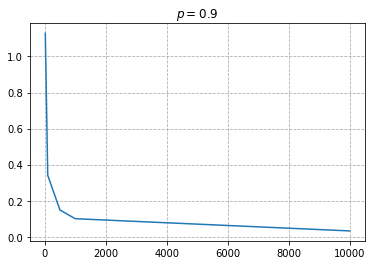

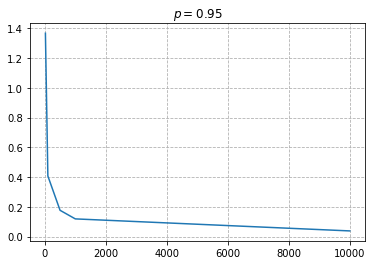

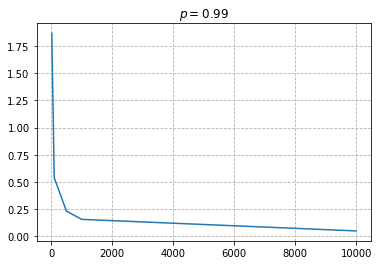

In [85]:
plot_conf_interval((0.01, 0.5), intervals)

Доверительный интервал для Дисперсии.

\begin{equation*}
\frac{nD}{\chi_{\frac{1-\gamma}{2}, n-1}^2} \leq D_x < \frac{nD}{\chi_{\frac{1+\gamma}{2}, n-1}^2}
\end{equation*}

In [23]:
def get_dispersion_interval(series, dispersion):
    ns = len(series) * dispersion
    dispersion_intervals = []
    for j in conf_level:
        chi_l = chi2.ppf(1 - (1 - j) / 2, len(series))
        chi_r = chi2.ppf(1 - (1 + j) / 2, len(series))
        dispersion_intervals.append((ns / chi_l, ns / chi_r))

    return dispersion_intervals

In [24]:
def create_practical_expected_interval(series):
    empiric_expected_value = calculate_expected_value(series)
    empiric_dispersion = calculate_dispersion(empiric_expected_value, series)
    return get_dispersion_interval(series, empiric_dispersion), empiric_dispersion

In [25]:
def plot_dispersion_cmp(series, y_lim=(0.01, 0.4)):
    empiric_interval_data = create_practical_expected_interval(series)
    print(f"Доверительный интервал дисперсии(n = {len(series)}): {empiric_interval_data[0][0]}")
    empiric_interval_len = calculate_intervals_len(empiric_interval_data[0])

    return empiric_interval_len

In [26]:
series_len = (20, 100, 500, 1000, 10000)
intervals = [plot_dispersion_cmp(generate_series(i)) for i in series_len]

Доверительный интервал дисперсии(n = 20): (1.130452425666642, 3.272382009979162)
Доверительный интервал дисперсии(n = 100): (0.748579845169357, 1.1944134327484626)
Доверительный интервал дисперсии(n = 500): (0.799003036666279, 0.9839768265703409)
Доверительный интервал дисперсии(n = 1000): (0.8431351330006924, 0.9768278421281298)
Доверительный интервал дисперсии(n = 10000): (0.9706120503165583, 1.016837225891135)


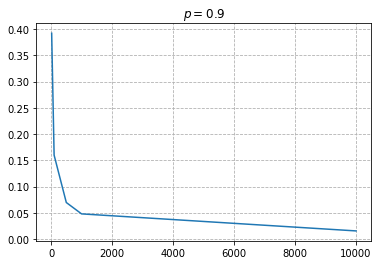

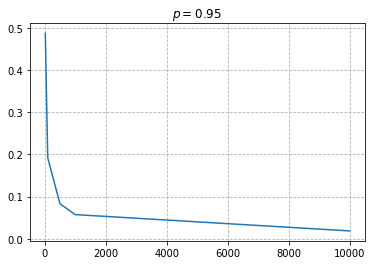

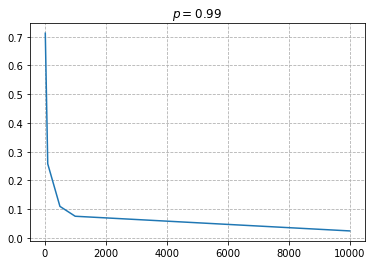

In [27]:
plot_conf_interval((0.01, 0.5), intervals)

Критерий согласия Пирсона:

\begin{equation*}
\chi^2 = N \sum_{i=1}^n \frac{(P_i^{эмп.} - P_i^{теор.})^2}{P_i^{теор.}}
\end{equation*}

In [27]:
def count_interval_values(sample, m, A, B):
    v = [0] * m
    for i in range(0, m):
        for value in sample:
            if A[i] < value < B[i]:
                v[i] += 1
    v[0] += 1
    v[-1] += 1
    return v

In [28]:
def split_series_into_intervals(sample, m, n):       
    delta = (sample[-1] - sample[0]) / m
    A = [sample[0] + (i - 1) * delta for i in range(1, m + 1)]
    B = [sample[0] + i * delta for i in range(1, m + 1)]
    v = count_interval_values(sample, m, A, B)
    f = [v[i] /(n * delta) for i in range(m)]
    return A, B, f

In [29]:
def Pearsons_chi_square_test(sample, m, n):
    A, B, f = split_series_into_intervals(sample, m, n)
    v_interval = count_interval_values(sample, m, A, B)
    p_interval = [v_interval[i] / n for i in range(m)]
    p_t = [F(B[i]) - F(A[i]) for i in range(m)]
    sig_level = 0.1
    if abs(1 - sum(p_t)) > sig_level:
        conf_interval *= 2
    chi_pract = n * sum([(p_t[i] - p_interval[i]) ** 2 / p_t[i] for i in range(m)])
    print("Критерий согласия Пирсона:")
    chi_lim = chi2.isf(sig_level, m - 1)
    if chi_pract < chi_lim:
        print(f"{chi_pract}  < {chi_lim}")
        print("Закон распределения соответсятвует теоретическому")
    else:
        print(f"{chi_pract}  > {chi_lim}")
        print("Закон распределения не соответсятвует теоретическому")



In [31]:
print("Введите n:")
n = int(input())
print("Введите m:")
m = int(input())


sample = sorted(generate_series(n))
Pearsons_chi_square_test(sample, m, n)

Введите n:
1000
Введите m:
200
Критерий согласия Пирсона:
210.31772658988214  < 224.9567936780495
Закон распределения соответсятвует теоретическому


### Дискретная СВ

In [20]:
def discrete_distribution(a, b, intervals_amount):
        part_size = 1 / intervals_amount
        r = random()
        part_num = r // part_size

        mult = (b - a) / intervals

        return part_num * mult + a
    
#print(discrete_distribution(5, 7, 100))

In [21]:
#"1-exp(-x**3)"
#"0"
#"3"

#"x**(1/2)" 
#0
#1

In [22]:

str_func = "1-exp(-x**3)" #"(x-5)/2"

a = 0.0

b = 3.0

intervals_number = 50

def F(x):
    xs = Symbol("x")
    expr = sympify(str_func)
    expr = lambdify(xs, expr)
    return expr(x)

In [23]:
def generate_discrete_distribution_probability(xs, intervals_number):
    distr_borders = []
    poss = []
    for i in range(intervals_number - 1):
        poss.append(F(xs[i+1]) - F(xs[i]))
    return poss


In [24]:
    def generate_discrete_value(xs, probs):
        position = random()
        acc = 0
        res = 0
        for i in range(len(probs)):
            acc += probs[i]
            if position <= acc:
                res = i
                return xs[res]
        return xs[-1]
    

In [25]:
def generate_series(amount):
    sample = []
    xs = list(np.linspace(a, b, num=intervals_number))
    probs = generate_discrete_distribution_probability(xs, intervals_number)
    for _ in range(amount):
        sample.append(generate_discrete_value(xs, probs))
    return sample


In [26]:
series = generate_series(1000)
series.sort()


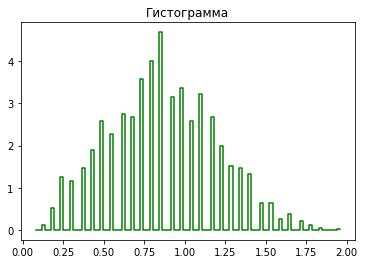

In [27]:
parts = 100
A_new, B_new, f_new, m_new = equal_interval_hist(series, len(series), parts)
plt.title("Гистограмма")
plt.step(B_new, f_new, color='green')
plt.show()

Точечная оценка мат. ожидания:

\begin{equation*}
m_x^* = \frac{1} n \sum_{i=1}^n x_i
\end{equation*}

Точечная оценка дисперсии:

\begin{equation*}
D = \frac{1}{n-1} \sum_{i=1}^n{\left( x_i - m_x^* \right)}^2
\end{equation*}

In [ ]:
print("n:")
n = int(input())
ser = generate_series(n)
exp = calculate_expected_value(ser)
print(f"Значения: {ser}")
print(f"Точечная оценка Мат. ожидания: {exp}")
print(f"Точечная оценка Дисперсии: {calculate_dispersion(exp, ser)}")

## Доверительный интервал для математического ожидания:

\begin{equation*}
m_x^* - \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}} \leq m_x \le m_x^* + \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}}
\end{equation*}

In [41]:
series_len = (20, 100, 500, 1000, 10000)
intervals = [plot_significance_level(generate_series(i)) for i in series_len]

Доверительный интервал мат. ожидания(n = 20): (0.840294899594692, 0.9781051004053081)
Доверительный интервал мат. ожидания(n = 100): (0.8356148227269009, 0.8651851772730992)
Доверительный интервал мат. ожидания(n = 500): (0.8705942391075869, 0.885805760892413)
Доверительный интервал мат. ожидания(n = 1000): (0.8567077404332837, 0.8672922595667163)
Доверительный интервал мат. ожидания(n = 10000): (0.8604792376488878, 0.8639207623511121)


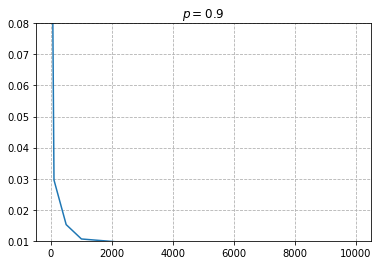

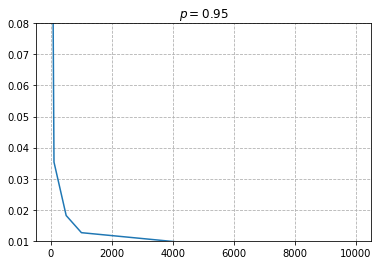

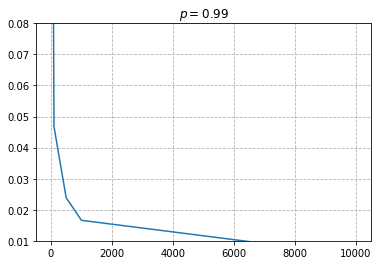

In [42]:
plot_conf_interval((0.01, 0.08), intervals)

Доверительный интервал для Дисперсии.

\begin{equation*}
\frac{nD}{\chi_{\frac{1-\gamma}{2}, n-1}^2} \leq D_x < \frac{nD}{\chi_{\frac{1+\gamma}{2}, n-1}^2}
\end{equation*}

In [54]:
series_len = (20, 100, 500, 1000, 10000)
intervals = [plot_dispersion_cmp(generate_series(i)) for i in series_len]

Доверительный интервал дисперсии(n = 20): (0.06946736489818105, 0.20109095262404333)
Доверительный интервал дисперсии(n = 100): (0.09908147499448301, 0.15809167910894992)
Доверительный интервал дисперсии(n = 500): (0.10015786453515524, 0.1233449851612103)
Доверительный интервал дисперсии(n = 1000): (0.10058813362473773, 0.11653800875626404)
Доверительный интервал дисперсии(n = 10000): (0.10387200337123743, 0.10881888363256584)


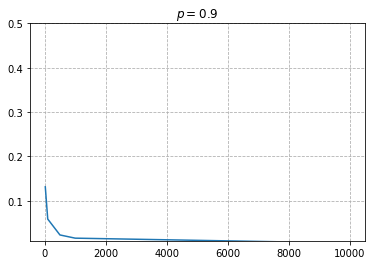

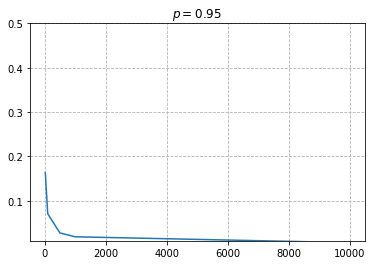

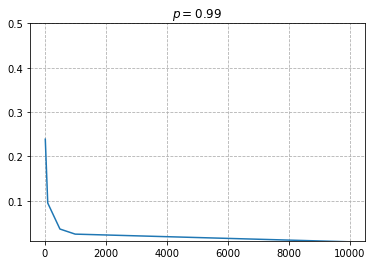

In [55]:
plot_conf_interval((0.01, 0.5), intervals)

Критерий согласия Пирсона:

\begin{equation*}
\chi^2 = N\sum_{i=1}^n \frac{(P_i^{эмп.} - P_i^{теор.})^2}{P_i^{теор.}}
\end{equation*}

In [60]:
print("Введите n:")
n = int(input())
print("Введите m:")
m = int(input())
sample = sorted(generate_series(n))
Pearsons_chi_square_test(sample, m, n)

Введите n:
100
Введите m:
20
Критерий согласия Пирсона:
16.595248066638145  < 27.20357102935684
Закон распределения соответсятвует теоретическому
